In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import impute
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [40]:
df = pd.read_csv('travel-times.csv')
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments;
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,;
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,;
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,;
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,;
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,;
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,08:09,Monday,GSK,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No,;
201,7/14/2011,08:03,Thursday,GSK,50.90,123.7,76.2,95.1,7.89,40.1,32.1,Yes,;
202,7/13/2011,17:08,Wednesday,Home,51.96,132.6,57.5,76.7,NaN,54.2,40.6,Yes,;
203,7/12/2011,17:51,Tuesday,Home,53.28,125.8,61.6,87.6,NaN,51.9,36.5,Yes,;


# Question 1

In [41]:
def sScaler(df):
    sta = preprocessing.StandardScaler()
    st = pd.DataFrame(sta.fit_transform(df), columns = df.columns)
    return st

def rScaler(df):
    rob = preprocessing.RobustScaler()
    rb = pd.DataFrame(rob.fit_transform(df), columns = df.columns)
    return rb

def mScaler(df):
    mia = preprocessing.MinMaxScaler()
    mm = pd.DataFrame(mia.fit_transform(df), columns = df.columns)
    return mm


norm = ['Distance', 'MaxSpeed', 'AvgSpeed', 'AvgMovingSpeed']

### normalisation par serie

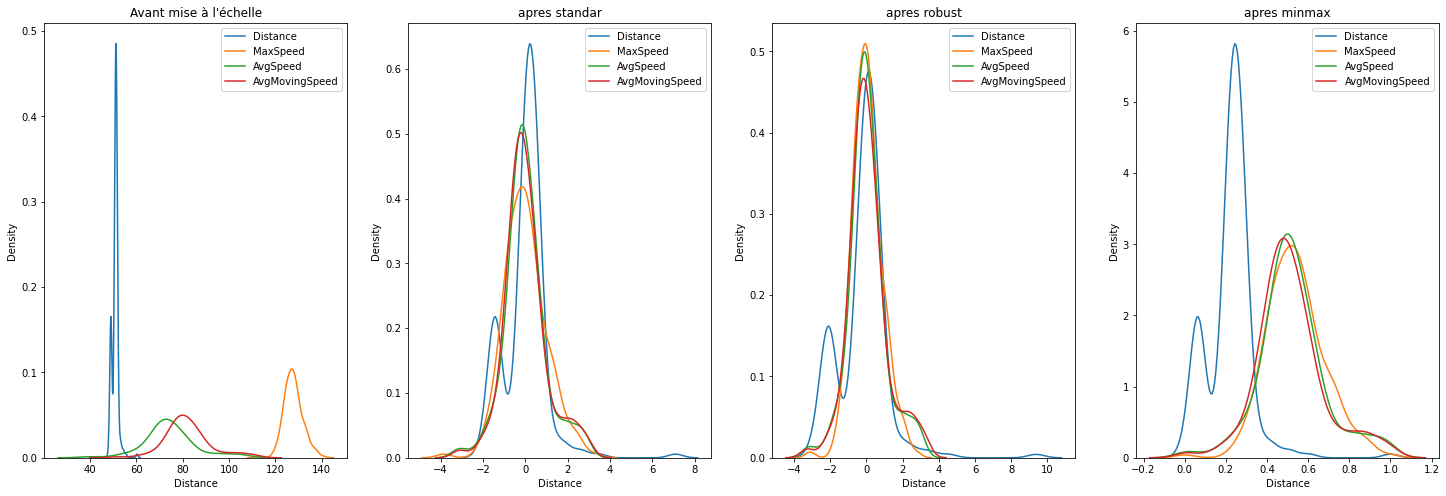

In [42]:
serie = df.iloc[:, 4:8]

ses = sScaler(serie)
ser = rScaler(serie)
sem = mScaler(serie)

figure, (cx1, cx2, cx3, cx4) = plt.subplots(ncols=4, figsize=(25,8))

cx1.set_title("Avant mise à l'échelle"  )
sns.kdeplot(df['Distance'], ax=cx1,label="Distance")
sns.kdeplot(df['MaxSpeed'], ax=cx1,label="MaxSpeed")
sns.kdeplot(df['AvgSpeed'], ax=cx1,label="AvgSpeed")
sns.kdeplot(df['AvgMovingSpeed'], ax=cx1,label="AvgMovingSpeed")
cx1.legend() 

cx2.set_title("apres standar"  )
sns.kdeplot(ses['Distance'], ax=cx2,label="Distance")
sns.kdeplot(ses['MaxSpeed'], ax=cx2,label="MaxSpeed")
sns.kdeplot(ses['AvgSpeed'], ax=cx2,label="AvgSpeed")
sns.kdeplot(ses['AvgMovingSpeed'], ax=cx2,label="AvgMovingSpeed")
cx2.legend() 

cx3.set_title("apres robust"  )
sns.kdeplot(ser['Distance'], ax=cx3,label="Distance")
sns.kdeplot(ser['MaxSpeed'], ax=cx3,label="MaxSpeed")
sns.kdeplot(ser['AvgSpeed'], ax=cx3,label="AvgSpeed")
sns.kdeplot(ser['AvgMovingSpeed'], ax=cx3,label="AvgMovingSpeed")
cx3.legend() 

cx4.set_title("apres minmax"  )
sns.kdeplot(sem['Distance'], ax=cx4,label="Distance")
sns.kdeplot(sem['MaxSpeed'], ax=cx4,label="MaxSpeed")
sns.kdeplot(sem['AvgSpeed'], ax=cx4,label="AvgSpeed")
sns.kdeplot(sem['AvgMovingSpeed'], ax=cx4,label="AvgMovingSpeed")
cx4.legend() 


plt.show()

on pourrait utiliser le standar scaler pour MaxSpeed, AvgSpeed, AvgMovingSpeed, et robust pour la distance mais je prefere utiliser robust pour tout le dataframe

In [43]:
df1 = df
for s in norm:
    df1[s] = ser[s]

df1

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments;
0,1/6/2012,16:37,Friday,Home,0.163265,0.000000,0.389140,0.363636,NaN,39.3,36.3,No,;
1,1/6/2012,08:20,Friday,GSK,0.510204,0.591837,0.705882,0.802139,NaN,37.9,34.9,No,;
2,1/4/2012,16:17,Wednesday,Home,0.142857,0.000000,0.723982,0.470588,NaN,37.5,35.9,No,;
3,1/4/2012,07:53,Wednesday,GSK,-2.000000,1.000000,0.018100,0.160428,NaN,39.8,35.6,No,;
4,1/3/2012,18:57,Tuesday,Home,0.020408,1.795918,0.850679,0.716578,NaN,36.8,34.8,No,;
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,08:09,Monday,GSK,3.459184,-0.367347,-2.180995,0.106952,7.89,65.5,39.7,No,;
201,7/14/2011,08:03,Thursday,GSK,-0.234694,-0.755102,0.199095,1.465241,7.89,40.1,32.1,Yes,;
202,7/13/2011,17:08,Wednesday,Home,0.846939,1.061224,-1.493213,-0.502674,NaN,54.2,40.6,Yes,;
203,7/12/2011,17:51,Tuesday,Home,2.193878,-0.326531,-1.122172,0.663102,NaN,51.9,36.5,Yes,;


# Question 2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

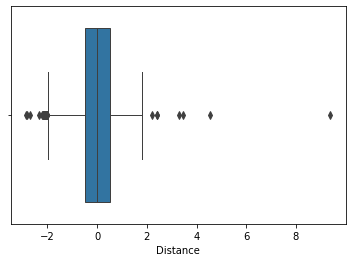

In [44]:
sns.boxplot(ser['Distance'], linewidth= 1.0)

In [45]:
ab = np.where(df1['Distance'] > 6)
df1.drop(ab[0], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxSpeed'>

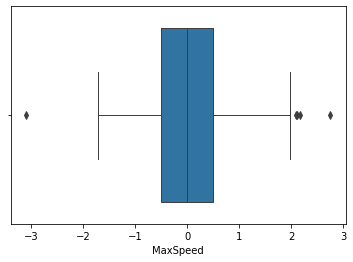

In [46]:
sns.boxplot(ser['MaxSpeed'], linewidth= 1.0)

In [47]:
n = int(-2)
ab = np.where(df1['MaxSpeed'] > 2.5)
ab1 = np.where(df1['MaxSpeed'] < n)
df1.drop(ab[0], inplace = True)
df1.drop(ab1[0], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AvgSpeed'>

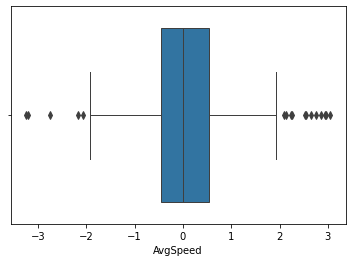

In [48]:
sns.boxplot(ser['AvgSpeed'], linewidth= 1.0)

In [49]:
n = int(-2.5)

ab1 = np.where(df1['MaxSpeed'] < n)

df1.drop(ab1[0], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AvgMovingSpeed'>

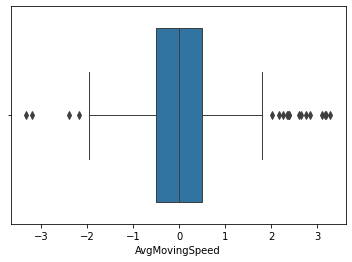

In [50]:
sns.boxplot(ser['AvgMovingSpeed'], linewidth= 1.0)

In [51]:
n = int(-2.5)

ab1 = np.where(df1['MaxSpeed'] < n)

df1.drop(ab1[0], inplace = True)

In [52]:
df1

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments;
0,1/6/2012,16:37,Friday,Home,0.163265,0.000000,0.389140,0.363636,NaN,39.3,36.3,No,;
1,1/6/2012,08:20,Friday,GSK,0.510204,0.591837,0.705882,0.802139,NaN,37.9,34.9,No,;
2,1/4/2012,16:17,Wednesday,Home,0.142857,0.000000,0.723982,0.470588,NaN,37.5,35.9,No,;
3,1/4/2012,07:53,Wednesday,GSK,-2.000000,1.000000,0.018100,0.160428,NaN,39.8,35.6,No,;
4,1/3/2012,18:57,Tuesday,Home,0.020408,1.795918,0.850679,0.716578,NaN,36.8,34.8,No,;
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,08:09,Monday,GSK,3.459184,-0.367347,-2.180995,0.106952,7.89,65.5,39.7,No,;
201,7/14/2011,08:03,Thursday,GSK,-0.234694,-0.755102,0.199095,1.465241,7.89,40.1,32.1,Yes,;
202,7/13/2011,17:08,Wednesday,Home,0.846939,1.061224,-1.493213,-0.502674,NaN,54.2,40.6,Yes,;
203,7/12/2011,17:51,Tuesday,Home,2.193878,-0.326531,-1.122172,0.663102,NaN,51.9,36.5,Yes,;


# Question 3

In [53]:
df1.isnull().sum()

Date               0
StartTime          2
DayOfWeek          2
GoingTo            2
Distance           2
MaxSpeed           2
AvgSpeed           2
AvgMovingSpeed     2
FuelEconomy       18
TotalTime          2
MovingTime         2
Take407All         2
Comments;          2
dtype: int64

un peu moin de 10% de l'information dans fuelEconomy et manquante et je ne juge pas l'information pertinante donc je l'est supprimer

In [56]:
del df1['FuelEconomy']
df1.isnull().sum()

Date              0
StartTime         2
DayOfWeek         2
GoingTo           2
Distance          2
MaxSpeed          2
AvgSpeed          2
AvgMovingSpeed    2
TotalTime         2
MovingTime        2
Take407All        2
Comments;         2
dtype: int64

In [58]:
df1.dropna(subset=['StartTime', 'DayOfWeek'], inplace=True)
# information crucial 
df1.isnull().sum()

Date              0
StartTime         0
DayOfWeek         0
GoingTo           0
Distance          0
MaxSpeed          0
AvgSpeed          0
AvgMovingSpeed    0
TotalTime         0
MovingTime        0
Take407All        0
Comments;         0
dtype: int64

In [60]:
df1.shape

(200, 12)

# Question 4

In [61]:
df1.dtypes

Date               object
StartTime          object
DayOfWeek          object
GoingTo            object
Distance          float64
MaxSpeed          float64
AvgSpeed          float64
AvgMovingSpeed    float64
TotalTime         float64
MovingTime        float64
Take407All         object
Comments;          object
dtype: object

les serie categorielle sont (DayOfWeek, GoingTo, Take407All)

In [63]:
dum = pd.get_dummies(df[['DayOfWeek', 'GoingTo', 'Take407All']], drop_first=True)
dfd = df1.drop(['DayOfWeek', 'GoingTo', 'Take407All'], axis=1)
df2 = pd.concat([dfd, dum], axis=1)
df2

,Date,StartTime,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Comments;,DayOfWeek_Monday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,GoingTo_Home,Take407All_Yes
0,1/6/2012,16:37,0.163265,0.000000,0.389140,0.363636,39.3,36.3,;,0,0,0,0,1,0
1,1/6/2012,08:20,0.510204,0.591837,0.705882,0.802139,37.9,34.9,;,0,0,0,0,0,0
2,1/4/2012,16:17,0.142857,0.000000,0.723982,0.470588,37.5,35.9,;,0,0,0,1,1,0
3,1/4/2012,07:53,-2.000000,1.000000,0.018100,0.160428,39.8,35.6,;,0,0,0,1,0,0
4,1/3/2012,18:57,0.020408,1.795918,0.850679,0.716578,36.8,34.8,;,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,08:09,3.459184,-0.367347,-2.180995,0.106952,65.5,39.7,;,1,0,0,0,0,0
201,7/14/2011,08:03,-0.234694,-0.755102,0.199095,1.465241,40.1,32.1,;,0,1,0,0,0,1
202,7/13/2011,17:08,0.846939,1.061224,-1.493213,-0.502674,54.2,40.6,;,0,0,0,1,1,1
203,7/12/2011,17:51,2.193878,-0.326531,-1.122172,0.663102,51.9,36.5,;,0,0,1,0,1,1


In [65]:
df2['Comments;'].unique()

array([';', 'Put snow tires on;', 'Huge traffic backup;',
       'Pumped tires up: check fuel economy improved?;',
       'Backed up at Bronte;', 'Rainy;',
       'Accident: backup from Hamilton to 407 ramp;', 'Raining;',
       'Back to school traffic?;', 'Took 407 all the way (to McMaster);',
       'Heavy volume on Derry;', 'Start early to run a batch;',
       'Accident at 403/highway 6; detour along Dundas', 'Detour taken;',
       'Must be Friday;', 'Medium amount of rain;', 'New tires;',
       'Turn around on Derry;', 'Empty roads;', 'Police slowdown on 403;',
       'Accident blocked 407 exit;'], dtype=object)

# Question 5

In [96]:
df3 = df2

for i in df3['Comments;']:
    if i == ';':
        df3['Delay'] = 0
        
    else:
        df3['Delay'] = 1
    

df3['LostTime'] = df3['TotalTime'] - df3['MovingTime']

df3

,Date,StartTime,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Comments;,DayOfWeek_Monday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,GoingTo_Home,Take407All_Yes,Delay,LostTime
0,1/6/2012,16:37,0.163265,0.000000,0.389140,0.363636,39.3,36.3,;,0,0,0,0,1,0,0,3.0
1,1/6/2012,08:20,0.510204,0.591837,0.705882,0.802139,37.9,34.9,;,0,0,0,0,0,0,0,3.0
2,1/4/2012,16:17,0.142857,0.000000,0.723982,0.470588,37.5,35.9,;,0,0,0,1,1,0,0,1.6
3,1/4/2012,07:53,-2.000000,1.000000,0.018100,0.160428,39.8,35.6,;,0,0,0,1,0,0,0,4.2
4,1/3/2012,18:57,0.020408,1.795918,0.850679,0.716578,36.8,34.8,;,0,0,1,0,1,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,08:09,3.459184,-0.367347,-2.180995,0.106952,65.5,39.7,;,1,0,0,0,0,0,0,25.8
201,7/14/2011,08:03,-0.234694,-0.755102,0.199095,1.465241,40.1,32.1,;,0,1,0,0,0,1,0,8.0
202,7/13/2011,17:08,0.846939,1.061224,-1.493213,-0.502674,54.2,40.6,;,0,0,0,1,1,1,0,13.6
203,7/12/2011,17:51,2.193878,-0.326531,-1.122172,0.663102,51.9,36.5,;,0,0,1,0,1,1,0,15.4


In [97]:
print(df3['LostTime'].min())

0.0


#### Donc notre cible sera la serie LostTime et le but sera de la minimiser.(zero sera l'objectif rechercher). Du au fait que notre cible est une valeur quantitative la nature de notre prediction sera une regression. Pour se faire je propose de prendre nos series (Distance	MaxSpeed	AvgSpeed	AvgMovingSpeed	TotalTime	MovingTime	Comments;	DayOfWeek_Monday	DayOfWeek_Thursday	DayOfWeek_Tuesday	DayOfWeek_Wednesday	GoingTo_Home	Take407All_Yes	Delay) et faire un ACP analyse en composant principale pour trouver nos vecteur/feature/predicteur. Il aurai etait interessant de ajouter l'heure de depart afin de voir si l'heure de point a un influence